# Eland Demo Notebook

In [1]:
import eland as ed
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from elasticsearch import Elasticsearch

# Import standard test settings for consistent results
from eland.conftest import *

## Create Eland DataFrame from Elasticsearch Index

In [2]:
ed_flights = ed.read_es('localhost', 'flights')

In [3]:
ed_flights.head()

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00


In [4]:
type(ed_flights.head())

eland.dataframe.DataFrame

## Compare to pandas DataFrame (created from the same data)

In [5]:
pd_flights = ed.eland_to_pandas(ed_flights)

In [6]:
pd_flights.head()

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00


In [7]:
ed_flights

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21


In [8]:
pd_flights

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21


In [9]:
print(ed_flights.tail().head(3).info_es())

index_pattern: flights
Index:
 index_field: _id
 is_source_field: False
Mappings:
 capabilities:                     _source   es_dtype        pd_dtype  searchable  aggregatable
AvgTicketPrice         True      float         float64        True          True
Cancelled              True    boolean            bool        True          True
Carrier                True    keyword          object        True          True
Dest                   True    keyword          object        True          True
DestAirportID          True    keyword          object        True          True
DestCityName           True    keyword          object        True          True
DestCountry            True    keyword          object        True          True
DestLocation           True  geo_point          object        True          True
DestRegion             True    keyword          object        True          True
DestWeather            True    keyword          object        True          True
DistanceKilo

In [10]:
ed_tail = ed_flights.tail()
print(ed_tail.info_es())

index_pattern: flights
Index:
 index_field: _id
 is_source_field: False
Mappings:
 capabilities:                     _source   es_dtype        pd_dtype  searchable  aggregatable
AvgTicketPrice         True      float         float64        True          True
Cancelled              True    boolean            bool        True          True
Carrier                True    keyword          object        True          True
Dest                   True    keyword          object        True          True
DestAirportID          True    keyword          object        True          True
DestCityName           True    keyword          object        True          True
DestCountry            True    keyword          object        True          True
DestLocation           True  geo_point          object        True          True
DestRegion             True    keyword          object        True          True
DestWeather            True    keyword          object        True          True
DistanceKilo

In [11]:
ed_flights.info()

<class 'eland.dataframe.DataFrame'>
Index: 13059 entries, 0 to 13058
Data columns (total 27 columns):
AvgTicketPrice        13059 non-null float64
Cancelled             13059 non-null bool
Carrier               13059 non-null object
Dest                  13059 non-null object
DestAirportID         13059 non-null object
DestCityName          13059 non-null object
DestCountry           13059 non-null object
DestLocation          13059 non-null object
DestRegion            13059 non-null object
DestWeather           13059 non-null object
DistanceKilometers    13059 non-null float64
DistanceMiles         13059 non-null float64
FlightDelay           13059 non-null bool
FlightDelayMin        13059 non-null int64
FlightDelayType       13059 non-null object
FlightNum             13059 non-null object
FlightTimeHour        13059 non-null float64
FlightTimeMin         13059 non-null float64
Origin                13059 non-null object
OriginAirportID       13059 non-null object
OriginCityName    

In [12]:
# NBVAL_IGNORE_OUTPUT
ed_flights.describe()

,AvgTicketPrice,DistanceKilometers,...,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,...,13059.000000,13059.000000
mean,628.253689,7092.142457,...,511.127842,2.835975
std,266.386661,4578.263193,...,334.741135,1.939365
min,100.020531,0.000000,...,0.000000,0.000000
25%,410.011039,2470.545974,...,251.672059,1.000000
50%,640.387285,7612.072403,...,503.148975,3.000000
75%,842.254990,9735.660463,...,720.571142,4.069106
max,1199.729004,19881.482422,...,1902.901978,6.000000


In [13]:
pd_flights.describe()

,AvgTicketPrice,DistanceKilometers,...,FlightTimeMin,dayOfWeek
count,13059.000000,13059.000000,...,13059.000000,13059.000000
mean,628.253689,7092.142455,...,511.127842,2.835975
std,266.396861,4578.438497,...,334.753952,1.939439
min,100.020528,0.000000,...,0.000000,0.000000
25%,409.893816,2459.705673,...,252.333192,1.000000
50%,640.556668,7610.330866,...,503.045170,3.000000
75%,842.185470,9736.637600,...,720.416036,4.000000
max,1199.729053,19881.482315,...,1902.902032,6.000000


In [14]:
pd_flights.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13059 entries, 0 to 13058
Data columns (total 27 columns):
AvgTicketPrice        13059 non-null float64
Cancelled             13059 non-null bool
Carrier               13059 non-null object
Dest                  13059 non-null object
DestAirportID         13059 non-null object
DestCityName          13059 non-null object
DestCountry           13059 non-null object
DestLocation          13059 non-null object
DestRegion            13059 non-null object
DestWeather           13059 non-null object
DistanceKilometers    13059 non-null float64
DistanceMiles         13059 non-null float64
FlightDelay           13059 non-null bool
FlightDelayMin        13059 non-null int64
FlightDelayType       13059 non-null object
FlightNum             13059 non-null object
FlightTimeHour        13059 non-null float64
FlightTimeMin         13059 non-null float64
Origin                13059 non-null object
OriginAirportID       13059 non-null object
OriginCityName  

In [15]:
ed_flights.shape

(13059, 27)

In [16]:
pd_flights.shape

(13059, 27)

In [17]:
ed_flights.shape

(13059, 27)

In [18]:
pd_flights.dtypes

AvgTicketPrice           float64
Cancelled                   bool
Carrier                   object
Dest                      object
DestAirportID             object
                       ...      
OriginLocation            object
OriginRegion              object
OriginWeather             object
dayOfWeek                  int64
timestamp         datetime64[ns]
Length: 27, dtype: object

In [19]:
ed_flights.columns

Index(['AvgTicketPrice', 'Cancelled', 'Carrier', 'Dest', 'DestAirportID', 'DestCityName',
       'DestCountry', 'DestLocation', 'DestRegion', 'DestWeather', 'DistanceKilometers',
       'DistanceMiles', 'FlightDelay', 'FlightDelayMin', 'FlightDelayType', 'FlightNum',
       'FlightTimeHour', 'FlightTimeMin', 'Origin', 'OriginAirportID', 'OriginCityName',
       'OriginCountry', 'OriginLocation', 'OriginRegion', 'OriginWeather', 'dayOfWeek',
       'timestamp'],
      dtype='object')

In [20]:
ed_flights.count()

AvgTicketPrice    13059
Cancelled         13059
Carrier           13059
Dest              13059
DestAirportID     13059
                  ...  
OriginLocation    13059
OriginRegion      13059
OriginWeather     13059
dayOfWeek         13059
timestamp         13059
Length: 27, dtype: int64

In [21]:
ed_flights.min()

AvgTicketPrice        100.020531
Cancelled               0.000000
DistanceKilometers      0.000000
DistanceMiles           0.000000
FlightDelay             0.000000
FlightDelayMin          0.000000
FlightTimeHour          0.000000
FlightTimeMin           0.000000
dayOfWeek               0.000000
dtype: float64

In [22]:
ed_flights.sum(numeric_only=True)

AvgTicketPrice        8.204365e+06
Cancelled             1.678000e+03
DistanceKilometers    9.261629e+07
DistanceMiles         5.754909e+07
FlightDelay           3.280000e+03
FlightDelayMin        6.181500e+05
FlightTimeHour        1.112470e+05
FlightTimeMin         6.674818e+06
dayOfWeek             3.703500e+04
dtype: float64

In [23]:
pd_flights.sum(numeric_only=True)

AvgTicketPrice        8.204365e+06
Cancelled             1.678000e+03
DistanceKilometers    9.261629e+07
DistanceMiles         5.754909e+07
FlightDelay           3.280000e+03
FlightDelayMin        6.181500e+05
FlightTimeHour        1.112470e+05
FlightTimeMin         6.674818e+06
dayOfWeek             3.703500e+04
dtype: float64

In [24]:
ed_flights['Carrier'].head()

0     Kibana Airlines
1    Logstash Airways
2    Logstash Airways
3     Kibana Airlines
4     Kibana Airlines
Name: Carrier, dtype: object

In [25]:
ed_flights.Carrier

0         Kibana Airlines
1        Logstash Airways
2        Logstash Airways
3         Kibana Airlines
4         Kibana Airlines
               ...       
13054    Logstash Airways
13055    Logstash Airways
13056    Logstash Airways
13057            JetBeats
13058            JetBeats
Name: Carrier, Length: 13059, dtype: object

In [26]:
ed_3_cols = ed_flights[['DistanceKilometers', 'Carrier', 'AvgTicketPrice']].head()
pd_3_cols = pd_flights[['DistanceKilometers', 'Carrier', 'AvgTicketPrice']].head()

In [27]:
ed_3_cols

,DistanceKilometers,Carrier,AvgTicketPrice
0,16492.326654,Kibana Airlines,841.265642
1,8823.400140,Logstash Airways,882.982662
2,0.000000,Logstash Airways,190.636904
3,555.737767,Kibana Airlines,181.694216
4,13358.244200,Kibana Airlines,730.041778


In [28]:
pd_3_cols

,DistanceKilometers,Carrier,AvgTicketPrice
0,16492.326654,Kibana Airlines,841.265642
1,8823.400140,Logstash Airways,882.982662
2,0.000000,Logstash Airways,190.636904
3,555.737767,Kibana Airlines,181.694216
4,13358.244200,Kibana Airlines,730.041778


In [29]:
print(ed_3_cols.info_es())

index_pattern: flights
Index:
 index_field: _id
 is_source_field: False
Mappings:
 capabilities:                     _source   es_dtype        pd_dtype  searchable  aggregatable
AvgTicketPrice         True      float         float64        True          True
Cancelled              True    boolean            bool        True          True
Carrier                True    keyword          object        True          True
Dest                   True    keyword          object        True          True
DestAirportID          True    keyword          object        True          True
DestCityName           True    keyword          object        True          True
DestCountry            True    keyword          object        True          True
DestLocation           True  geo_point          object        True          True
DestRegion             True    keyword          object        True          True
DestWeather            True    keyword          object        True          True
DistanceKilo

In [30]:
pd_flights[pd_flights.Carrier=='Kibana Airlines']

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00
7,585.184310,False,...,0,2018-01-01 04:54:59
8,960.869736,True,...,0,2018-01-01 12:09:35
...,...,...,...,...,...
13018,580.741028,True,...,6,2018-02-11 04:47:00
13020,952.452244,False,...,6,2018-02-11 23:50:12
13024,530.799356,False,...,6,2018-02-11 11:45:58
13027,999.021256,False,...,6,2018-02-11 13:32:15


In [31]:
pd_col0 = pd_flights.drop(['Carrier', 'DestCityName'], axis=1)
pd_col1 = pd_flights.drop(columns=['Carrier', 'DestCityName'])

ed_col0 = ed_flights.drop(['Carrier', 'DestCityName'], axis=1)
ed_col1 = ed_flights.drop(columns=['Carrier', 'DestCityName'])

In [32]:
pd_col0

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21


In [33]:
ed_col0

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
1,882.982662,False,...,0,2018-01-01 18:27:00
2,190.636904,False,...,0,2018-01-01 17:11:14
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00
...,...,...,...,...,...
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21


In [34]:
pd_idx0 = pd_flights.drop(['1', '2'])
ed_idx0 = ed_flights.drop(['1', '2'])

In [35]:
pd_idx0

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00
5,418.152089,False,...,0,2018-01-01 01:43:03
6,180.246816,False,...,0,2018-01-01 13:49:53
...,...,...,...,...,...
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21


In [36]:
ed_idx0

,AvgTicketPrice,Cancelled,...,dayOfWeek,timestamp
0,841.265642,False,...,0,2018-01-01 00:00:00
3,181.694216,True,...,0,2018-01-01 10:33:28
4,730.041778,False,...,0,2018-01-01 05:13:00
5,418.152089,False,...,0,2018-01-01 01:43:03
6,180.246816,False,...,0,2018-01-01 13:49:53
...,...,...,...,...,...
13054,1080.446279,False,...,6,2018-02-11 20:42:25
13055,646.612941,False,...,6,2018-02-11 01:41:57
13056,997.751876,False,...,6,2018-02-11 04:09:27
13057,1102.814465,False,...,6,2018-02-11 08:28:21


In [37]:
df = pd.DataFrame(data={'A': [0.1, 1.0, 10.0],
                                'B': 1,
                                'C': 'foo',
                                'D': pd.Timestamp('20190102'),
                                'E': [1.0, 2.0, 3.0],
                                'F': False,
                                'G': [1, 2, 3]},
                          index=['0','1','2'])

expected_mappings = {'mappings': {
    'properties': {'A': {'type': 'double'},
                   'B': {'type': 'long'},
                   'C': {'type': 'keyword'},
                   'D': {'type': 'date'},
                   'E': {'type': 'double'},
                   'F': {'type': 'boolean'},
                   'G': {'type': 'long'}}}}

mappings = ed.Mappings._generate_es_mappings(df)

assert expected_mappings == mappings

# Now create index
index_name = 'eland_test_generate_es_mappings'

ed.pandas_to_eland(df, 'localhost', index_name, if_exists="replace", refresh=True)

ed_df = ed.DataFrame('localhost', index_name)

In [38]:
ed_df

,A,B,...,F,G
0,0.1,1,...,False,1
1,1.0,1,...,False,2
2,10.0,1,...,False,3


In [39]:
df

,A,B,...,F,G
0,0.1,1,...,False,1
1,1.0,1,...,False,2
2,10.0,1,...,False,3


In [40]:
df = ed.eland_to_pandas(ed_df)
df

,A,B,...,F,G
0,0.1,1,...,False,1
1,1.0,1,...,False,2
2,10.0,1,...,False,3


In [41]:
ed_df.count()

A    3
B    3
C    3
D    3
E    3
F    3
G    3
dtype: int64

In [42]:
ed_numeric_fields = ed_flights.select_dtypes(include=[np.number])

ed_numeric_fields.columns

Index(['AvgTicketPrice', 'DistanceKilometers', 'DistanceMiles', 'FlightDelayMin', 'FlightTimeHour',
       'FlightTimeMin', 'dayOfWeek'],
      dtype='object')

In [43]:
ed_numeric_fields.aggregate(['min', 'std', 'mean'])

,AvgTicketPrice,DistanceKilometers,...,FlightTimeMin,dayOfWeek
min,100.020531,0.000000,...,0.000000,0.000000
std,266.386661,4578.263193,...,334.741135,1.939365
mean,628.253689,7092.142457,...,511.127842,2.835975


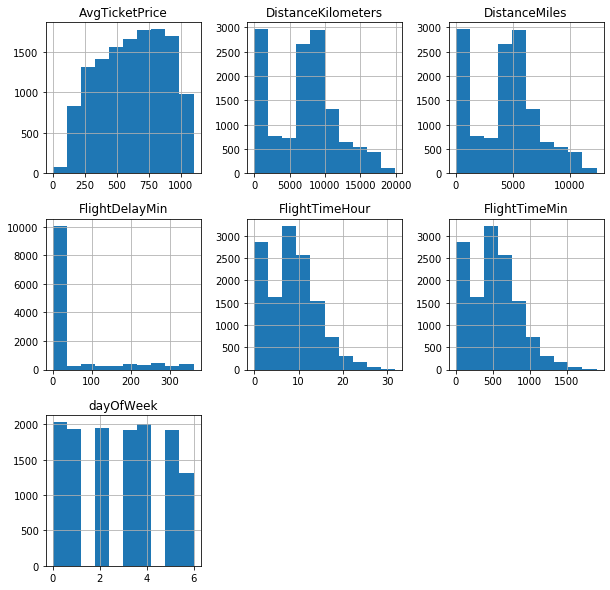

In [44]:
ed_numeric_fields.hist(figsize=[10,10])
plt.show()

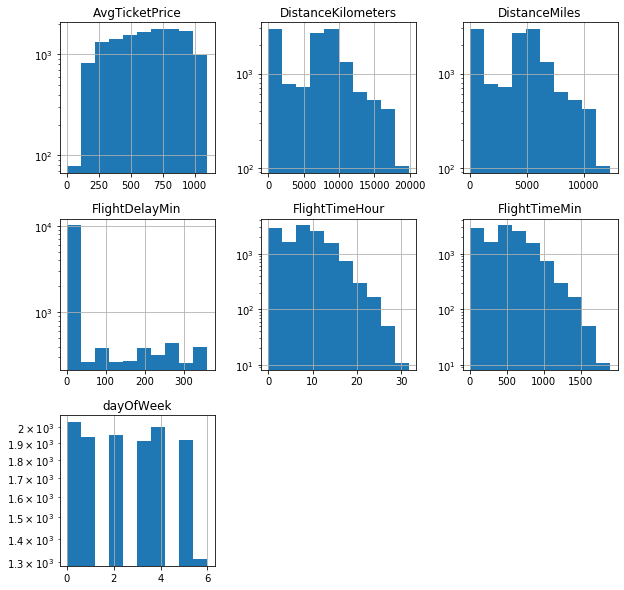

In [45]:
ed_numeric_fields.hist(figsize=[10,10], log=True)
plt.show()